32개 하나의 id로 만들기

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
import numpy as np

In [62]:
path1='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/data_all.xlsx'
#'/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0819_normed_min.xlsx'

In [63]:
data= pd.read_excel(path1)

In [64]:
data

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,d_ratio,d_ratio_sq,sin dif,엄지 중지 내적,검지 중지 내적,y,image
0,0.802822,0.683172,-0.000059,0.796290,0.661867,-0.146656,0.757204,0.551149,-0.192669,0.706601,0.448169,-0.197359,0.655755,0.354045,-0.204960,0.790932,0.368932,-0.129292,0.698669,0.313862,-0.172512,0.632303,0.337803,-0.203215,0.582439,0.375781,-0.222803,0.767720,0.376558,-0.066249,0.674490,0.323270,-0.119961,0.611638,0.368772,-0.157459,0.563561,0.424743,-0.177124,0.747185,0.405188,-0.011417,0.671273,0.403154,-0.081756,0.651415,0.484210,-0.115277,0.636442,0.549586,-0.129835,0,0,0,0,0,1,correct18.MP4_000003.040.jpg
1,0.802112,0.672191,-0.000017,0.795411,0.642390,-0.143206,0.759011,0.525775,-0.185622,0.707753,0.423363,-0.191975,0.659722,0.332323,-0.206871,0.805196,0.353425,-0.120753,0.716508,0.304782,-0.167444,0.651719,0.327338,-0.198758,0.602915,0.368467,-0.217108,0.774002,0.358659,-0.055587,0.680201,0.312513,-0.119463,0.617398,0.358546,-0.161553,0.567457,0.416868,-0.181146,0.745328,0.382709,-0.000876,0.664769,0.395086,-0.077951,0.645512,0.484567,-0.118999,0.630237,0.551435,-0.134810,0,0,0,0,0,1,correct18.MP4_000003.160.jpg
2,0.834878,0.630622,-0.000036,0.832766,0.562037,-0.129846,0.795560,0.451895,-0.171299,0.735935,0.353962,-0.183522,0.687844,0.256539,-0.208985,0.823451,0.278121,-0.086189,0.737856,0.238672,-0.133510,0.679090,0.265810,-0.178718,0.640781,0.307479,-0.210603,0.787495,0.296410,-0.029600,0.700509,0.257458,-0.090715,0.640829,0.308430,-0.147433,0.605954,0.356631,-0.180794,0.757250,0.327631,0.016060,0.680012,0.327506,-0.052788,0.646495,0.405078,-0.102559,0.631131,0.453318,-0.129861,0,0,0,0,0,1,correct18.MP4_000003.640.jpg
3,0.840423,0.611011,-0.000028,0.835926,0.539953,-0.117908,0.799676,0.425365,-0.148123,0.748405,0.330711,-0.154980,0.702745,0.246166,-0.177059,0.816756,0.283106,-0.073382,0.738299,0.233189,-0.122390,0.679344,0.252439,-0.170702,0.635466,0.291793,-0.204810,0.782272,0.301644,-0.018568,0.701290,0.262287,-0.068624,0.643236,0.303859,-0.120193,0.605661,0.355507,-0.151100,0.752858,0.330315,0.024647,0.682568,0.320169,-0.040536,0.645990,0.383178,-0.094835,0.622334,0.434460,-0.124643,0,0,0,0,0,1,correct18.MP4_000003.761.jpg
4,0.846491,0.607810,-0.000035,0.832838,0.530135,-0.118343,0.795919,0.423277,-0.151772,0.743653,0.332124,-0.160703,0.700847,0.235392,-0.184964,0.826159,0.247272,-0.073614,0.737623,0.216855,-0.118516,0.674505,0.248014,-0.160364,0.632795,0.280961,-0.187706,0.794500,0.274452,-0.015906,0.707748,0.258341,-0.073416,0.660718,0.329992,-0.122204,0.640665,0.384702,-0.140170,0.766458,0.309036,0.030765,0.697225,0.319558,-0.036545,0.681332,0.406327,-0.077488,0.680488,0.460202,-0.090807,0,0,0,0,0,1,correct18.MP4_000003.880.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,0.683287,0.925784,-0.000051,0.683226,0.808627,-0.066687,0.691961,0.666358,-0.079175,0.706048,0.554577,-0.080995,0.723846,0.447428,-0.080970,0.687060,0.600681,0.005907,0.703182,0.481403,0.028084,0.724452,0.415654,0.039631,0.746156,0.370086,0.050197,0.694650,0.627415,0.051697,0.701560,0.514276,0.090203,0.717508,0.461997,0.105240,0.733055,0.419804,0.115534,0.701844,0.655029,0.089303,0.708349,0.560268,0.130411,0.719038,0.512440,0.142770,0.729677,0.475407,0.150917,0,0,0,0,0,0,not_correct7.mp4_000004.574.jpg
2081,0.689466,0.911463,-0.000065,0.662194,0.809515,-0.053108,0.658066,0.686111,-0.058303,0.662225,0.588759,-0.051490,0.672364,0.500283,-0.043548,0.684964,0.597477,0.009075,0.699973,0.486054,0.027304,0.711765,0.429146,0.027077,0.720656,0.390802,0.025083,0.695864,0.605227,0.048374,0.710104,0.490839,0.079638,0.720213,0.433627,0.090777,0.731818,0.400537,0.096398,0.703909,0.623557,0

In [65]:
data[data['y']==1].image.str[0:9].value_counts() #20

correct28    100
correct20    100
correct27    100
correct36    100
correct35     98
correct31     98
correct29     96
correct30     95
correct4.     85
correct19     82
correct38     81
correct22     78
correct41     77
correct3.     73
correct18     70
correct33     68
correct26     47
correct23     47
correct5.     37
correct21     36
correct32     25
correct34      2
correct39      1
Name: image, dtype: int64

In [66]:
data[data['y']==0].image.str[0:14].value_counts() #6

not_correct11.    100
not_correct6.m     96
not_correct12.     88
not_correct10.     85
not_correct13.     77
not_correct7.m     36
not_correct18.      7
Name: image, dtype: int64

In [67]:
print(data[data.image.str.startswith('not_correct11')].index[0])
print(data[data.image.str.startswith('not_correct6.')].index[0])
print(data[data.image.str.startswith('not_correct12')].index[0])
print(data[data.image.str.startswith('not_correct10')].index[0])
print(data[data.image.str.startswith('not_correct13')].index[0])
print(data[data.image.str.startswith('not_correct7.')].index[0])

1681
1953
1781
1596
1869
2049


In [68]:
print(data[data.image.str.startswith('correct27')].index[0])
print(data[data.image.str.startswith('correct36')].index[0])
print(data[data.image.str.startswith('correct20')].index[0])
print(data[data.image.str.startswith('correct28')].index[0])
print(data[data.image.str.startswith('correct35')].index[0])
print(data[data.image.str.startswith('correct31')].index[0])
print(data[data.image.str.startswith('correct29')].index[0])

print(data[data.image.str.startswith('correct30')].index[0])
print(data[data.image.str.startswith('correct4.')].index[0])
print(data[data.image.str.startswith('correct19')].index[0])
print(data[data.image.str.startswith('correct38')].index[0])
print(data[data.image.str.startswith('correct3.')].index[0])
print(data[data.image.str.startswith('correct41')].index[0])
print(data[data.image.str.startswith('correct18')].index[0])
print(data[data.image.str.startswith('correct22')].index[0])
print(data[data.image.str.startswith('correct33')].index[0])
print(data[data.image.str.startswith('correct26')].index[0])
print(data[data.image.str.startswith('correct23')].index[0])
print(data[data.image.str.startswith('correct5.')].index[0])
print(data[data.image.str.startswith('correct21')].index[0])

460
1215
152
560
1117
924
660
829
1397
70
1315
756
1482
0
288
1047
413
366
1559
252


In [69]:
data.columns

Index(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3',
       'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6',
       'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9',
       'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12',
       'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
       'x_16', 'y_16', 'z_16', 'd_ratio', 'd_ratio_sq', 'sin dif', '엄지 중지 내적',
       '검지 중지 내적', 'y', 'image'],
      dtype='object')

In [70]:
data.drop(['d_ratio', 'd_ratio_sq', 'sin dif', '엄지 중지 내적','검지 중지 내적'], axis=1, inplace=True)

In [71]:
len(data.columns)

53

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

##데이터 변형

In [73]:
data['id'] = -1
data['time'] = -1

In [74]:
index = [1681,1713, 1745, 1953,1985,2017, 1781,1813,1596,1628, 1869,1901, 2049,
         460, 492, 524, 1215, 1247, 1279, 152, 184, 216, 560, 592, 624, 1117, 1149, 1181, 924, 956, 988, 660, 692, 724,
         829,861, 1397,1429, 70, 102, 1315, 1347, 756, 788, 1482, 1514, 0, 32, 288, 320, 1047, 1079, 413, 366, 1559, 252] #시작 index

for i,j in enumerate(index):
  data[j: j+32]['id'] = i
  data[j: j+32]['time'] = range(0,32)

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image,id,time
0,0.802822,0.683172,-0.000059,0.796290,0.661867,-0.146656,0.757204,0.551149,-0.192669,0.706601,0.448169,-0.197359,0.655755,0.354045,-0.204960,0.790932,0.368932,-0.129292,0.698669,0.313862,-0.172512,0.632303,0.337803,-0.203215,0.582439,0.375781,-0.222803,0.767720,0.376558,-0.066249,0.674490,0.323270,-0.119961,0.611638,0.368772,-0.157459,0.563561,0.424743,-0.177124,0.747185,0.405188,-0.011417,0.671273,0.403154,-0.081756,0.651415,0.484210,-0.115277,0.636442,0.549586,-0.129835,1,correct18.MP4_000003.040.jpg,46,0
1,0.802112,0.672191,-0.000017,0.795411,0.642390,-0.143206,0.759011,0.525775,-0.185622,0.707753,0.423363,-0.191975,0.659722,0.332323,-0.206871,0.805196,0.353425,-0.120753,0.716508,0.304782,-0.167444,0.651719,0.327338,-0.198758,0.602915,0.368467,-0.217108,0.774002,0.358659,-0.055587,0.680201,0.312513,-0.119463,0.617398,0.358546,-0.161553,0.567457,0.416868,-0.181146,0.745328,0.382709,-0.000876,0.664769,0.395086,-0.077951,0.645512,0.484567,-0.118999,0.630237,0.551435,-0.134810,1,correct18.MP4_000003.160.jpg,46,1
2,0.834878,0.630622,-0.000036,0.832766,0.562037,-0.129846,0.795560,0.451895,-0.171299,0.735935,0.353962,-0.183522,0.687844,0.256539,-0.208985,0.823451,0.278121,-0.086189,0.737856,0.238672,-0.133510,0.679090,0.265810,-0.178718,0.640781,0.307479,-0.210603,0.787495,0.296410,-0.029600,0.700509,0.257458,-0.090715,0.640829,0.308430,-0.147433,0.605954,0.356631,-0.180794,0.757250,0.327631,0.016060,0.680012,0.327506,-0.052788,0.646495,0.405078,-0.102559,0.631131,0.453318,-0.129861,1,correct18.MP4_000003.640.jpg,46,2
3,0.840423,0.611011,-0.000028,0.835926,0.539953,-0.117908,0.799676,0.425365,-0.148123,0.748405,0.330711,-0.154980,0.702745,0.246166,-0.177059,0.816756,0.283106,-0.073382,0.738299,0.233189,-0.122390,0.679344,0.252439,-0.170702,0.635466,0.291793,-0.204810,0.782272,0.301644,-0.018568,0.701290,0.262287,-0.068624,0.643236,0.303859,-0.120193,0.605661,0.355507,-0.151100,0.752858,0.330315,0.024647,0.682568,0.320169,-0.040536,0.645990,0.383178,-0.094835,0.622334,0.434460,-0.124643,1,correct18.MP4_000003.761.jpg,46,3
4,0.846491,0.607810,-0.000035,0.832838,0.530135,-0.118343,0.795919,0.423277,-0.151772,0.743653,0.332124,-0.160703,0.700847,0.235392,-0.184964,0.826159,0.247272,-0.073614,0.737623,0.216855,-0.118516,0.674505,0.248014,-0.160364,0.632795,0.280961,-0.187706,0.794500,0.274452,-0.015906,0.707748,0.258341,-0.073416,0.660718,0.329992,-0.122204,0.640665,0.384702,-0.140170,0.766458,0.309036,0.030765,0.697225,0.319558,-0.036545,0.681332,0.406327,-0.077488,0.680488,0.460202,-0.090807,1,correct18.MP4_000003.880.jpg,46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,0.683287,0.925784,-0.000051,0.683226,0.808627,-0.066687,0.691961,0.666358,-0.079175,0.706048,0.554577,-0.080995,0.723846,0.447428,-0.080970,0.687060,0.600681,0.005907,0.703182,0.481403,0.028084,0.724452,0.415654,0.039631,0.746156,0.370086,0.050197,0.694650,0.627415,0.051697,0.701560,0.514276,0.090203,0.717508,0.461997,0.105240,0.733055,0.419804,0.115534,0.701844,0.655029,0.089303,0.708349,0.560268,0.130411,0.719038,0.512440,0.142770,0.729677,0.475407,0.150917,0,not_correct7.mp4_000004.574.jpg,12,31
2081,0.689466,0.911463,-0.000065,0.662194,0.809515,-0.053108,0.658066,0.686111,-0.058303,0.662225,0.588759,-0.051490,0.672364,0.500283,-0.043548,0.684964,0.597477,0.009075,0.699973,0.486054,0.027304,0.711765,0.429146,0.027077,0.720656,0.390802,0.025083,0.695864,0.605227,0.048374,0.710104,0.490839,0.079638,0.720213,0.433627,0.090777,0.731818,0.400537,0.096398,0.703909,0.623557,0.081234,0.715664,0.525182,0.108200,0.722518,0.468309,0.115346,0.728340,0.43873

In [75]:
for i in range(len(data)):
  if data['id'][i] == -1:
    data.drop(i, axis=0, inplace=True)

In [76]:
data.reset_index(drop=True, inplace=True)

In [77]:
data

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image,id,time
0,0.802822,0.683172,-0.000059,0.796290,0.661867,-0.146656,0.757204,0.551149,-0.192669,0.706601,0.448169,-0.197359,0.655755,0.354045,-0.204960,0.790932,0.368932,-0.129292,0.698669,0.313862,-0.172512,0.632303,0.337803,-0.203215,0.582439,0.375781,-0.222803,0.767720,0.376558,-0.066249,0.674490,0.323270,-0.119961,0.611638,0.368772,-0.157459,0.563561,0.424743,-0.177124,0.747185,0.405188,-0.011417,0.671273,0.403154,-0.081756,0.651415,0.484210,-0.115277,0.636442,0.549586,-0.129835,1,correct18.MP4_000003.040.jpg,46,0
1,0.802112,0.672191,-0.000017,0.795411,0.642390,-0.143206,0.759011,0.525775,-0.185622,0.707753,0.423363,-0.191975,0.659722,0.332323,-0.206871,0.805196,0.353425,-0.120753,0.716508,0.304782,-0.167444,0.651719,0.327338,-0.198758,0.602915,0.368467,-0.217108,0.774002,0.358659,-0.055587,0.680201,0.312513,-0.119463,0.617398,0.358546,-0.161553,0.567457,0.416868,-0.181146,0.745328,0.382709,-0.000876,0.664769,0.395086,-0.077951,0.645512,0.484567,-0.118999,0.630237,0.551435,-0.134810,1,correct18.MP4_000003.160.jpg,46,1
2,0.834878,0.630622,-0.000036,0.832766,0.562037,-0.129846,0.795560,0.451895,-0.171299,0.735935,0.353962,-0.183522,0.687844,0.256539,-0.208985,0.823451,0.278121,-0.086189,0.737856,0.238672,-0.133510,0.679090,0.265810,-0.178718,0.640781,0.307479,-0.210603,0.787495,0.296410,-0.029600,0.700509,0.257458,-0.090715,0.640829,0.308430,-0.147433,0.605954,0.356631,-0.180794,0.757250,0.327631,0.016060,0.680012,0.327506,-0.052788,0.646495,0.405078,-0.102559,0.631131,0.453318,-0.129861,1,correct18.MP4_000003.640.jpg,46,2
3,0.840423,0.611011,-0.000028,0.835926,0.539953,-0.117908,0.799676,0.425365,-0.148123,0.748405,0.330711,-0.154980,0.702745,0.246166,-0.177059,0.816756,0.283106,-0.073382,0.738299,0.233189,-0.122390,0.679344,0.252439,-0.170702,0.635466,0.291793,-0.204810,0.782272,0.301644,-0.018568,0.701290,0.262287,-0.068624,0.643236,0.303859,-0.120193,0.605661,0.355507,-0.151100,0.752858,0.330315,0.024647,0.682568,0.320169,-0.040536,0.645990,0.383178,-0.094835,0.622334,0.434460,-0.124643,1,correct18.MP4_000003.761.jpg,46,3
4,0.846491,0.607810,-0.000035,0.832838,0.530135,-0.118343,0.795919,0.423277,-0.151772,0.743653,0.332124,-0.160703,0.700847,0.235392,-0.184964,0.826159,0.247272,-0.073614,0.737623,0.216855,-0.118516,0.674505,0.248014,-0.160364,0.632795,0.280961,-0.187706,0.794500,0.274452,-0.015906,0.707748,0.258341,-0.073416,0.660718,0.329992,-0.122204,0.640665,0.384702,-0.140170,0.766458,0.309036,0.030765,0.697225,0.319558,-0.036545,0.681332,0.406327,-0.077488,0.680488,0.460202,-0.090807,1,correct18.MP4_000003.880.jpg,46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.646430,0.868588,0.000056,0.667618,0.774128,-0.063848,0.665707,0.619334,-0.070030,0.656655,0.483713,-0.069227,0.666949,0.357811,-0.070154,0.667142,0.492571,0.039859,0.650528,0.354228,0.027480,0.611135,0.319827,-0.013011,0.576090,0.345731,-0.045571,0.631005,0.500633,0.069722,0.607278,0.345567,0.071340,0.559468,0.310641,0.025422,0.525917,0.342244,-0.010656,0.598694,0.527005,0.087540,0.567894,0.405231,0.085545,0.528282,0.388275,0.027661,0.501926,0.412425,-0.015594,0,not_correct7.mp4_000003.910.jpg,12,27
1788,0.657495,0.906455,0.000071,0.662536,0.803699,-0.075704,0.654859,0.644828,-0.083387,0.647721,0.512234,-0.079885,0.671554,0.400986,-0.076337,0.665531,0.523941,0.034348,0.650421,0.390662,0.021195,0.616678,0.350754,-0.014517,0.585972,0.366161,-0.041030,0.636306,0.532200,0.072270,0.613181,0.388509,0.073412,0.568929,0.344748,0.035953,0.536787,0.370203,0.010675,0.607702,0.560174,0.097323,0.571123,0.461581,0.092033,0.528309,0.443845,0.032418,0.502171,0.4

In [78]:
data[data.id == 43]

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image,id,time
704,0.841688,0.923453,-1.795815e-07,0.861351,0.736278,-0.094040,0.836921,0.529203,-0.102587,0.778835,0.366151,-0.100973,0.742944,0.219524,-0.106663,0.867819,0.374808,0.025427,0.794303,0.245188,-0.002381,0.726114,0.208798,-0.062897,0.663394,0.220833,-0.111542,0.814332,0.425379,0.069499,0.728952,0.311312,0.036171,0.645926,0.297074,-0.055755,0.575185,0.314360,-0.124675,0.765383,0.489488,0.104299,0.679545,0.421895,0.049132,0.612053,0.463474,-0.055171,0.557441,0.513777,-0.122904,1,correct3.mp4_000002.724.jpg,43,0
705,0.837985,0.918602,3.898150e-05,0.854413,0.733754,-0.102722,0.832481,0.526139,-0.112735,0.775156,0.362129,-0.109548,0.735236,0.216482,-0.116584,0.866514,0.381222,0.025937,0.799613,0.241905,-0.006740,0.728152,0.208751,-0.074973,0.660716,0.230504,-0.130945,0.812093,0.427029,0.075372,0.730911,0.303740,0.036743,0.649225,0.298684,-0.059877,0.579637,0.332009,-0.126467,0.763519,0.486595,0.113493,0.678403,0.420122,0.051384,0.613364,0.468856,-0.057515,0.560074,0.525533,-0.123359,1,correct3.mp4_000002.790.jpg,43,1
706,0.841108,0.912728,4.652439e-05,0.860791,0.729214,-0.097016,0.838074,0.525356,-0.110949,0.780150,0.362499,-0.113243,0.741709,0.217145,-0.126675,0.868387,0.379118,0.014138,0.798068,0.243921,-0.018251,0.726553,0.214416,-0.084136,0.660717,0.239573,-0.140374,0.812995,0.426208,0.059681,0.727753,0.309205,0.021026,0.646299,0.303478,-0.071246,0.578950,0.336626,-0.137159,0.763362,0.487051,0.096611,0.676399,0.424598,0.037334,0.613841,0.474760,-0.066753,0.565240,0.534194,-0.132114,1,correct3.mp4_000002.858.jpg,43,2
707,0.839890,0.918384,3.252309e-05,0.852076,0.738007,-0.090254,0.830997,0.533134,-0.099603,0.776182,0.371501,-0.100359,0.736803,0.223323,-0.112983,0.869634,0.386869,0.036268,0.807603,0.252817,0.012172,0.743305,0.213378,-0.050407,0.681469,0.228291,-0.103455,0.815542,0.429674,0.079626,0.742030,0.309887,0.056140,0.665480,0.284752,-0.031494,0.597889,0.299796,-0.096192,0.765681,0.489337,0.113803,0.685109,0.423915,0.062360,0.617800,0.462979,-0.043945,0.562852,0.515707,-0.113607,1,correct3.mp4_000002.925.jpg,43,3
708,0.839080,0.913778,2.238534e-05,0.851032,0.730482,-0.089850,0.828624,0.525036,-0.096776,0.771386,0.368361,-0.094028,0.733368,0.224080,-0.101845,0.860570,0.381904,0.041689,0.799282,0.251972,0.009834,0.733308,0.220022,-0.057957,0.671174,0.244261,-0.110850,0.807577,0.429815,0.084334,0.733100,0.308097,0.057252,0.658135,0.293376,-0.033576,0.593980,0.322221,-0.101793,0.760262,0.493648,0.115804,0.682336,0.424608,0.061067,0.616219,0.457304,-0.048067,0.560985,0.510904,-0.119866,1,correct3.mp4_000002.991.jpg,43,4
709,0.838352,0.922115,3.103994e-05,0.851916,0.731907,-0.096019,0.829746,0.525391,-0.104833,0.776483,0.363440,-0.102954,0.741040,0.214492,-0.110270,0.863290,0.381427,0.028127,0.798598,0.249858,0.001138,0.732693,0.228005,-0.062926,0.673911,0.262072,-0.118589,0.810631,0.428219,0.073444,0.728178,0.316007,0.039507,0.648265,0.320030,-0.056752,0.582898,0.364083,-0.128748,0.763149,0.487334,0.108407,0.678663,0.420795,0.055660,0.611551,0.467602,-0.049087,0.558865,0.528656,-0.116495,1,correct3.mp4_000003.058.jpg,43,5
710,0.834965,0.919957,7.309442e-06,0.847414,0.726364,-0.087586,0.826680,0.520216,-0.091580,0.778122,0.363936,-0.088593,0.748661,0.210155,-0.092677,0.857816,0.384512,0.048933,0.801495,0.253739,0.030516,0.742871,0.221271,-0.026594,0.689104,0.247729,-0.076533,0.805932,0.437478,0.089183,0.728926,0.326900,0.059387,0.651580,0.330663,-0.038728,0.591141,0.375313,-0.112636,0.759695,0.499598,0.118404,0.682592,0.423408,0.070564,0.617850,0.468697,-0.034834,0.569723,0.534556,-0.103563,1,correct3.mp4_000003.124.jpg,43,6
711,0.839221,0.920012,7.570471e-07,0.850484,0.724935,-0.090691,0.827398,0.516362,-0.095161,0.775659,0.359916,-0.088331,0.742590,0.211712,-0.093373,0.861970,0.380929,0.041

In [79]:
data[data["y"]==0].id.value_counts()

12    32
11    32
10    32
9     32
8     32
7     32
6     32
5     32
4     32
3     32
2     32
1     32
0     32
Name: id, dtype: int64

In [80]:
data[data["y"]==1].id.value_counts()

55    32
23    32
31    32
30    32
29    32
28    32
27    32
26    32
25    32
24    32
22    32
33    32
21    32
20    32
19    32
18    32
17    32
16    32
15    32
14    32
32    32
34    32
54    32
45    32
53    32
52    32
51    32
50    32
49    32
48    32
47    32
46    32
44    32
35    32
43    32
42    32
41    32
40    32
39    32
38    32
37    32
36    32
13    32
Name: id, dtype: int64

In [81]:
X_labels = pd.DataFrame(data["id"].value_counts().index, columns=['id'])
X_labels["label"] = -1

for i in range(len(X_labels)):
  if X_labels["id"][i] in range(13): #올바르지 않은 13개
    X_labels["label"][i] = 0
  else:                       #올바른 43 개
    X_labels["label"][i] = 1

print(X_labels)

    id  label
0   55      1
1   54      1
2   25      1
3   24      1
4   23      1
5   22      1
6   21      1
7   20      1
8   19      1
9   18      1
10  17      1
11  16      1
12  15      1
13  14      1
14  13      1
15  12      0
16  11      0
17  10      0
18   9      0
19   8      0
20   7      0
21   6      0
22   5      0
23   4      0
24   3      0
25   2      0
26   1      0
27  26      1
28  27      1
29  28      1
30  42      1
31  53      1
32  52      1
33  51      1
34  50      1
35  49      1
36  48      1
37  47      1
38  46      1
39  45      1
40  44      1
41  43      1
42  41      1
43  29      1
44  40      1
45  39      1
46  38      1
47  37      1
48  36      1
49  35      1
50  34      1
51  33      1
52  32      1
53  31      1
54  30      1
55   0      0


In [82]:
data.drop(['image'], axis=1, inplace = True)

In [83]:
#data.to_excel('data0826.xlsx', index=False)

In [84]:
data.drop(['y'], axis=1, inplace = True)

#LSTM

데이터셋 분리

In [85]:
temp_y = data[data["id"] <=9]
temp_x1 = data["id"] >=13
temp_x2 = data["id"] <=45
temp_x = data[temp_x1 & temp_x2]
train = pd.concat([temp_y,temp_x], axis=0)
test = data.drop(train.index, axis=0)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [86]:
temp_y = X_labels[X_labels["id"] <=9]
temp_x1 = X_labels["id"] >=13
temp_x2 = X_labels["id"] <=45
temp_x = X_labels[temp_x1 & temp_x2]
train_labels = pd.concat([temp_y,temp_x], axis=0)
test_labels = X_labels.drop(train_labels.index, axis=0)

train_labels.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)

In [87]:
train = train.sort_values(by = ['id','time'])

In [88]:
train

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,id,time
64,0.864425,0.792344,0.000072,0.815787,0.709231,-0.096041,0.754999,0.581232,-0.117506,0.699125,0.481782,-0.116737,0.646335,0.398678,-0.129281,0.781707,0.484250,-0.019113,0.701017,0.442857,-0.025976,0.640969,0.470760,-0.051350,0.598391,0.509090,-0.070614,0.772896,0.517568,0.039789,0.688779,0.484886,0.040440,0.639929,0.536481,0.015394,0.612791,0.591299,-0.006185,0.764601,0.556947,0.090724,0.690257,0.539268,0.086896,0.648177,0.576608,0.060508,0.626243,0.624077,0.042860,0,0
65,0.885232,0.810187,0.000029,0.828942,0.692130,-0.071402,0.765845,0.571322,-0.081058,0.708309,0.478954,-0.079210,0.649331,0.401440,-0.086103,0.772779,0.507390,0.032859,0.700539,0.439851,0.041144,0.648375,0.458153,0.023143,0.614679,0.499886,0.006109,0.767960,0.547487,0.079358,0.689428,0.493315,0.101221,0.642564,0.525166,0.076953,0.614262,0.570772,0.050737,0.763059,0.592629,0.117663,0.695185,0.546452,0.135619,0.654488,0.566083,0.115413,0.632384,0.604361,0.098441,0,1
66,0.864863,0.797412,0.000089,0.808469,0.704699,-0.079245,0.748477,0.582296,-0.095207,0.695889,0.483659,-0.094478,0.641634,0.397432,-0.107209,0.775052,0.499439,-0.000257,0.700147,0.441002,0.000622,0.641875,0.460064,-0.015060,0.604336,0.498302,-0.028637,0.770657,0.531221,0.051505,0.688037,0.488831,0.065026,0.639281,0.522325,0.043409,0.611631,0.565056,0.019958,0.764452,0.570696,0.096550,0.691676,0.540944,0.108412,0.648874,0.564109,0.084408,0.625142,0.602264,0.064075,0,2
67,0.881533,0.841011,0.000074,0.811040,0.710058,-0.070966,0.743374,0.581862,-0.085772,0.689840,0.489731,-0.087659,0.634102,0.401324,-0.098238,0.768784,0.504414,0.031303,0.694124,0.457231,0.046853,0.638258,0.491832,0.028361,0.606948,0.542499,0.011118,0.763728,0.548738,0.079900,0.683012,0.510049,0.110725,0.632551,0.545312,0.091841,0.606346,0.591416,0.067545,0.758574,0.594894,0.118495,0.690195,0.561620,0.145878,0.645943,0.577806,0.126218,0.623766,0.616881,0.107313,0,3
68,0.851038,0.813227,0.000014,0.807165,0.717019,-0.084853,0.753351,0.583154,-0.104856,0.697289,0.480308,-0.102952,0.642900,0.406907,-0.116190,0.773303,0.505558,-0.035539,0.694661,0.460735,-0.045646,0.635706,0.470566,-0.063358,0.592215,0.493870,-0.076586,0.767475,0.536497,0.018789,0.680811,0.506782,0.015073,0.634903,0.549332,-0.005395,0.606349,0.598510,-0.021792,0.759439,0.572680,0.066720,0.683805,0.550432,0.063215,0.642950,0.583469,0.040111,0.620077,0.626678,0.024529,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,0.653145,0.814844,0.000104,0.594265,0.627660,-0.056500,0.557390,0.466350,-0.054751,0.525716,0.349040,-0.045941,0.488981,0.234023,-0.044572,0.629078,0.408697,0.059929,0.584960,0.323096,0.088775,0.535415,0.294682,0.083638,0.494747,0.290332,0.076583,0.630857,0.456243,0.103091,0.571553,0.371122,0.137768,0.517940,0.368820,0.111550,0.481762,0.399835,0.088470,0.627211,0.504313,0.138546,0.567905,0.445307,0.168988,0.520429,0.449512,0.133739,0.490931,0.482157,0.109113,45,27
1372,0.650183,0.816277,0.000033,0.606493,0.641018,-0.062727,0.573649,0.479540,-0.063722,0.543308,0.367022,-0.056869,0.506956,0.252372,-0.057321,0.634436,0.419162,0.060842,0.582069,0.316333,0.076166,0.525126,0.278569,0.057989,0.480311,0.270143,0.040483,0.625205,0.468231,0.104403,0.560450,0.377429,0.134480,0.499249,0.359425,0.099165,0.454983,0.376922,0.068592,0.611636,0.519198,0.138640,0.545603,0.454338,0.155354,0.492157,0.458591,0.104508,0.460216,0.497392,0.073558,45,28
1373,0.661699,0.811229,0.000006,0.611541,0.644171,-0.056316,0.570906,0.489271,-0.053297,0.538691,0.381490,-0.042971,0.501150,0.275399,-0.040492,0.605107,0.461083,0.062277,0.556744,0.357090,0.093686,0.508237,0.309092,0.097667,0.468184,0.28

In [89]:
test = test.sort_values(by = ['id','time'])

In [90]:
test

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,id,time
320,0.296638,0.101323,-2.704703e-05,0.288557,0.250717,-0.081969,0.307923,0.419230,-0.090131,0.340337,0.552881,-0.092750,0.370444,0.668853,-0.090934,0.351050,0.507534,0.046259,0.392716,0.621927,0.039984,0.433171,0.612382,-0.011545,0.456259,0.541263,-0.053616,0.383964,0.461142,0.086024,0.443118,0.582959,0.094976,0.487268,0.579072,0.039706,0.507479,0.521831,-0.008258,0.408814,0.404315,0.112513,0.466273,0.487691,0.106261,0.501786,0.471894,0.048335,0.519133,0.429390,0.003951,10,0
321,0.291699,0.098271,-9.784716e-07,0.287664,0.241092,-0.087187,0.308989,0.415549,-0.093973,0.337536,0.557079,-0.091667,0.364999,0.678571,-0.085731,0.349497,0.511177,0.032152,0.395190,0.629595,0.023286,0.439558,0.608266,-0.023199,0.463106,0.534132,-0.058005,0.383373,0.467755,0.076972,0.441521,0.593225,0.078670,0.485273,0.581159,0.031233,0.504292,0.521084,-0.009039,0.409332,0.414042,0.110885,0.466461,0.494730,0.094876,0.501723,0.466251,0.037309,0.516594,0.411079,-0.003776,10,1
322,0.287369,0.097682,1.232693e-05,0.282054,0.243489,-0.089600,0.303651,0.412168,-0.098741,0.334619,0.546193,-0.098725,0.366896,0.662969,-0.095919,0.348488,0.508929,0.034385,0.391863,0.625640,0.022605,0.435962,0.614587,-0.026916,0.462883,0.548910,-0.065099,0.384764,0.462818,0.078075,0.443718,0.580023,0.077940,0.492095,0.577624,0.025906,0.518334,0.526991,-0.015179,0.411555,0.406450,0.109700,0.471935,0.480180,0.093922,0.512587,0.459859,0.029462,0.534983,0.412965,-0.017068,10,2
323,0.292484,0.105371,2.084148e-05,0.286150,0.245491,-0.089877,0.305526,0.404995,-0.106527,0.340310,0.533846,-0.115846,0.377523,0.645043,-0.121974,0.356477,0.509010,0.030501,0.403060,0.620237,0.013272,0.448709,0.613854,-0.042304,0.478364,0.545846,-0.089655,0.391954,0.465061,0.069420,0.454650,0.570429,0.066198,0.503338,0.569492,0.005642,0.530070,0.515913,-0.045685,0.418246,0.408577,0.095446,0.479856,0.478176,0.078393,0.521268,0.463167,0.014150,0.546356,0.419074,-0.033762,10,3
324,0.290960,0.087107,1.049628e-05,0.284010,0.241723,-0.088059,0.309554,0.403505,-0.099861,0.346933,0.531958,-0.105575,0.376400,0.640530,-0.106262,0.362137,0.507197,0.042167,0.404396,0.621704,0.024673,0.449821,0.622615,-0.032705,0.479968,0.558226,-0.081889,0.399152,0.460794,0.081171,0.457300,0.569876,0.080190,0.508404,0.576128,0.015295,0.537050,0.523071,-0.041120,0.425808,0.401720,0.105887,0.484392,0.471476,0.091550,0.525333,0.461496,0.022083,0.548946,0.420440,-0.029627,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.628466,0.683914,2.746813e-05,0.636347,0.592392,-0.103234,0.625780,0.477728,-0.128182,0.600075,0.374871,-0.140603,0.578534,0.281237,-0.159208,0.659852,0.361292,-0.034292,0.617864,0.272615,-0.082759,0.571495,0.264969,-0.131533,0.537722,0.290206,-0.160530,0.626861,0.377211,0.007648,0.576487,0.297122,-0.053101,0.529899,0.333818,-0.112182,0.504261,0.399281,-0.137239,0.598220,0.406563,0.039030,0.545073,0.367117,-0.034894,0.508409,0.429368,-0.089586,0.487688,0.491730,-0.106566,55,27
92,0.619608,0.688467,3.338113e-05,0.625199,0.597367,-0.104809,0.618036,0.480816,-0.126945,0.591540,0.374193,-0.133978,0.569366,0.281173,-0.145310,0.656420,0.352016,-0.044202,0.610784,0.260580,-0.093620,0.567275,0.261639,-0.142933,0.537812,0.301700,-0.174564,0.623709,0.365560,-0.001254,0.573172,0.275087,-0.059261,0.527373,0.306613,-0.114770,0.501339,0.367968,-0.145397,0.593904,0.392420,0.031450,0.537878,0.356563,-0.043307,0.496394,0.417055,-0.100636,0.471388,0.481542,-0.126376,55,28
93,0.608255,0.686431,3.026639e-05,0.613869,0.595284,-0.104891,0.608165,0.483375,-0.130637,0.585491,0.375194,-0.140618,0.566403,0.279046,-0.156920,0.653642,0.356133,-0.058658,0.

In [91]:
train_labels = train_labels.sort_values('id')

In [92]:
test_labels = test_labels.sort_values('id')

In [93]:
test_labels["0"]=0
test_labels["1"]=0

In [94]:
test_labels

,id,label,0,1
4,10,0,0,0
3,11,0,0,0
2,12,0,0,0
12,46,1,0,0
11,47,1,0,0
10,48,1,0,0
9,49,1,0,0
8,50,1,0,0
7,51,1,0,0
6,52,1,0,0


##plot graph

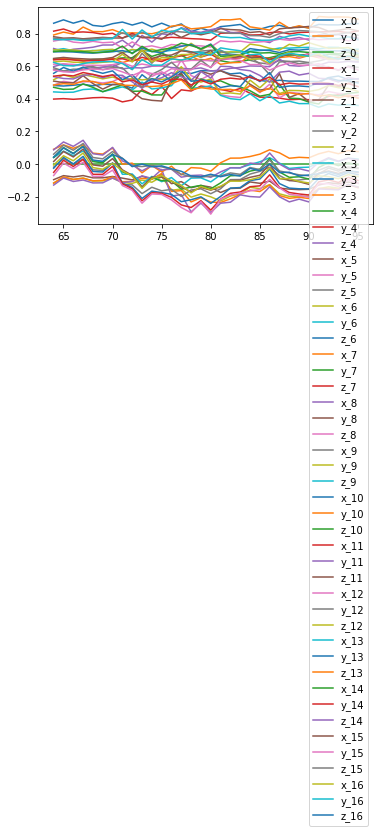

In [95]:
ex= train[train['id']==0]
ex.iloc[:,:-2].plot()

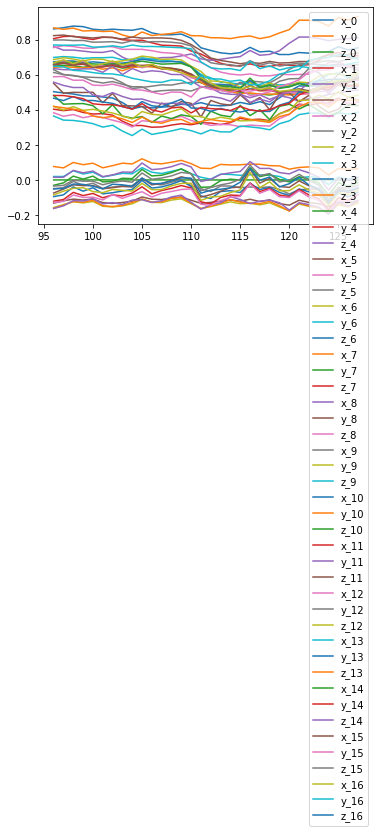

In [96]:
ex= train[train['id']==1]
ex.iloc[:,:-2].plot()

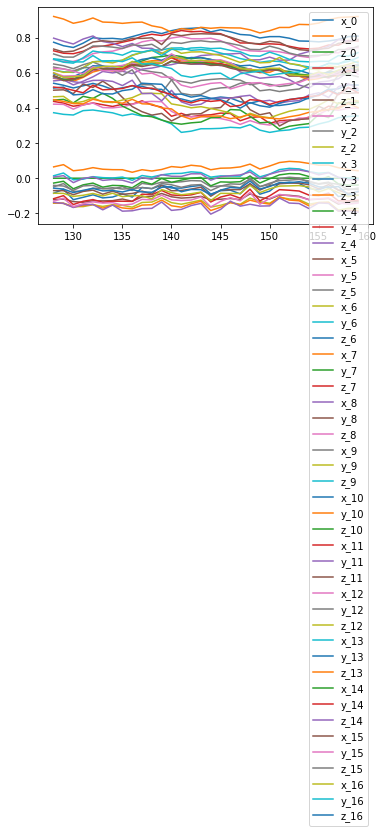

In [97]:
ex= train[train['id']==2]
ex.iloc[:,:-2].plot()

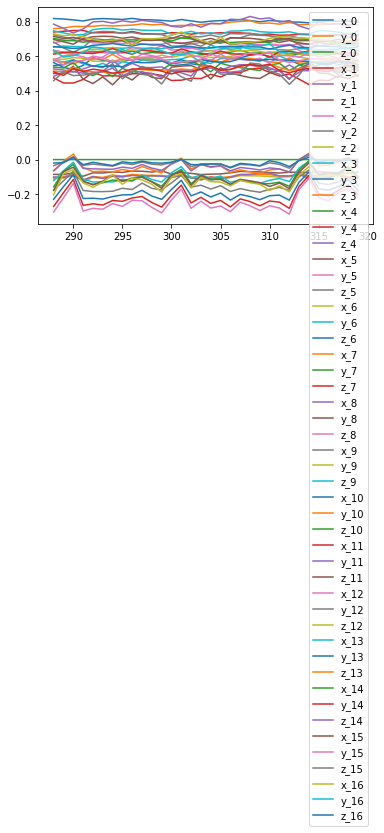

In [98]:
ex= train[train['id']==5]
ex.iloc[:,:-2].plot()

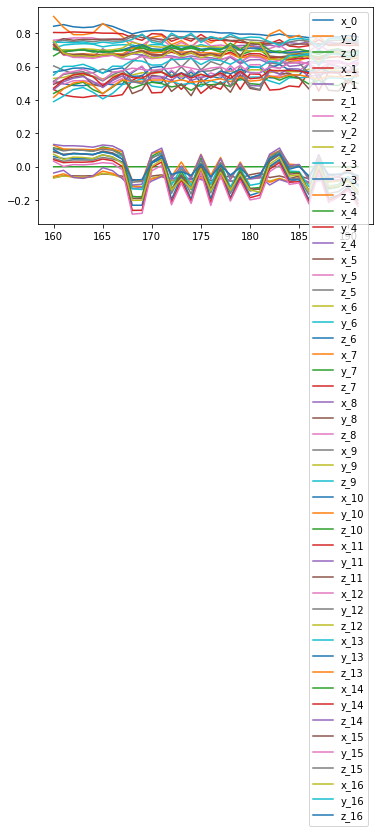

In [99]:
ex= train[train['id']==6]
ex.iloc[:,:-2].plot()

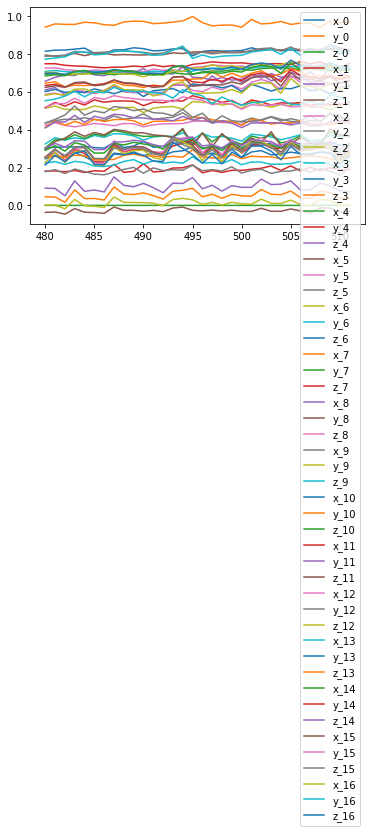

In [100]:
ex= train[train['id']==13]
ex.iloc[:,:-2].plot()

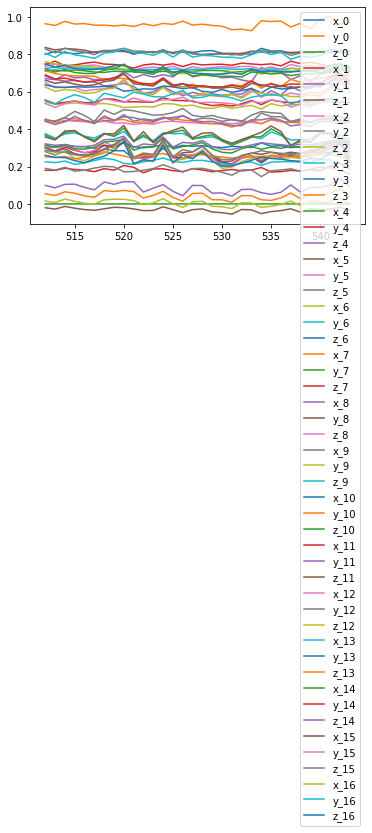

In [101]:
ex= train[train['id']==14]
ex.iloc[:,:-2].plot()

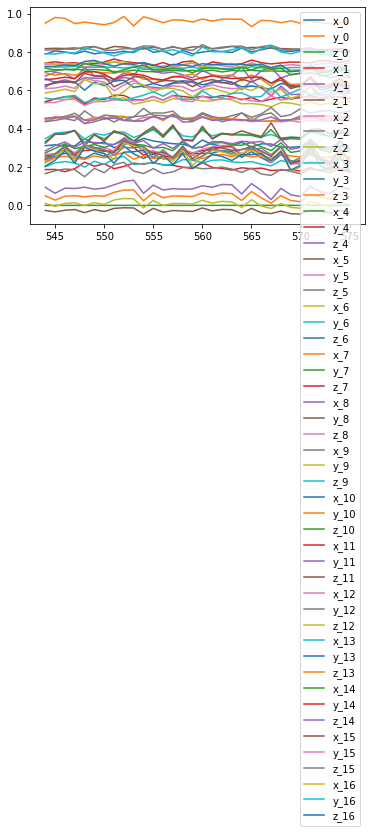

In [102]:
ex= train[train['id']==15]
ex.iloc[:,:-2].plot()

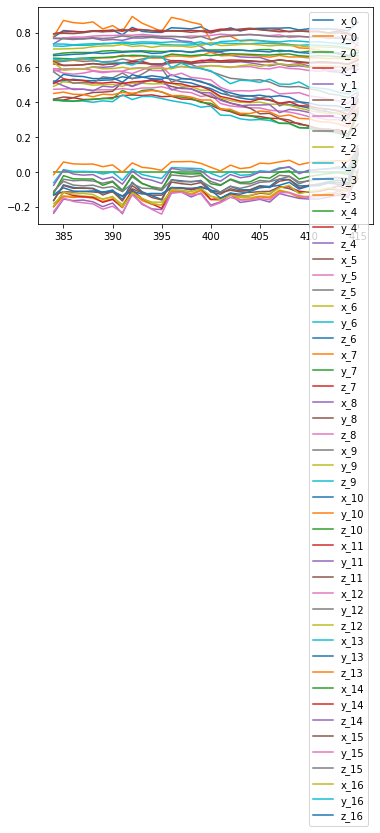

In [103]:
ex= train[train['id']==19]
ex.iloc[:,:-2].plot()

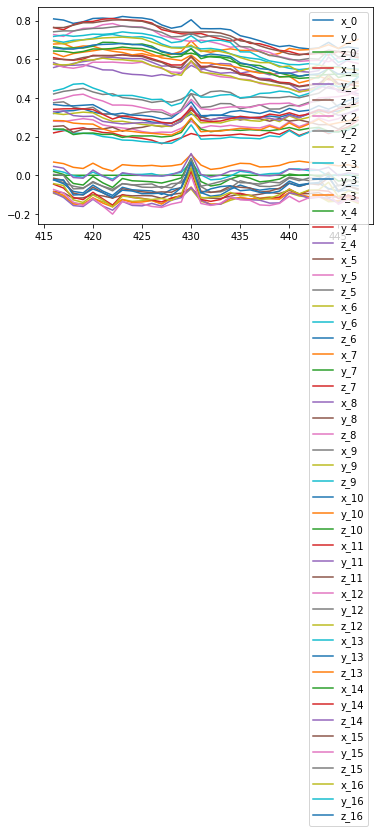

In [104]:
ex= train[train['id']==20]
ex.iloc[:,:-2].plot()

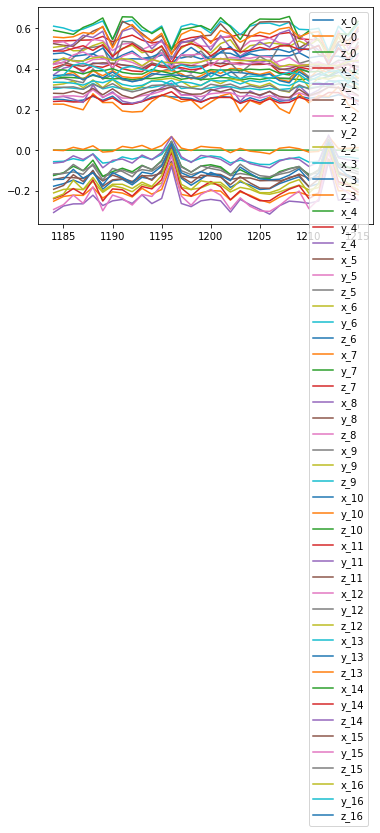

In [105]:
ex= train[train['id']==40]
ex.iloc[:,:-2].plot()

# 모델구축

In [106]:
#train=scaler.fit_transform(train.iloc[:,:-2])

In [107]:
#test=scaler.fit_transform(test.iloc[:,:-2])

In [108]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [109]:
X=tf.reshape(np.array(train.iloc[:,:-2]),[-1, 32, 51]) # 마지막은 열 개수
X.shape

#43,32,35

TensorShape([43, 32, 51])

In [110]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

#43,2

(43, 2)

In [111]:
model = Sequential()
model.add(LSTM(32, input_shape=(32,51))) #개수, 열
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax')) #label 개수

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
model.fit(X,y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6321 - accuracy: 0.7059 - val_loss: 0.3892 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 39ms/step - loss: 0.6021 - accuracy: 0.7059 - val_loss: 0.4544 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 43ms/step - loss: 0.5889 - accuracy: 0.7059 - val_loss: 0.3466 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 43ms/step - loss: 0.5751 - accuracy: 0.7059 - val_loss: 0.5079 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 0.5573 - accuracy: 0.7059 - val_loss: 0.3314 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 40ms/step - loss: 0.5489 - accuracy: 0.7059 - val_loss: 0.5644 - val_accuracy: 0.7778
Epoch 7/20
1/1 [==============================] - 0s 47ms/step - loss: 0.5264 - accuracy: 0.8235 - val_loss: 0.3480 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=============

In [113]:
y #왼쪽 올바르지 않은, 오른쪽 올바른

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [114]:
test_X=tf.reshape(np.array(test.iloc[:,:-2]),[-1, 32, 51]) # 마지막은 열 개수
test_X.shape

TensorShape([13, 32, 51])

In [115]:
prediction = model.predict(test_X)

In [116]:
prediction.shape

#13, 2

(13, 2)

In [117]:
test_labels.iloc[:,2:]=prediction

In [118]:
test_labels

,id,label,0,1
4,10,0,0.640525,0.359475
3,11,0,0.606344,0.393656
2,12,0,0.080119,0.919881
12,46,1,0.683645,0.316355
11,47,1,0.859428,0.140572
10,48,1,0.648735,0.351265
9,49,1,0.807715,0.192285
8,50,1,0.377220,0.622780
7,51,1,0.315993,0.684007
6,52,1,0.674217,0.325783
